In [257]:
from utils import show, getColor
from skimage import feature, morphology
import numpy as np
import cv2
import os
import numpy as np
from skimage import morphology
from skimage.morphology import medial_axis
from skimage.util import invert
from skimage.io import imread
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [243]:
imgPath = os.path.join('..', 'textures', 'map.png')
# imgPath = os.path.join('..', 'textures', 'map.jpg')
# imgPath = os.path.join('..', 'textures', 'world.png')
imgSize = (300, 300)

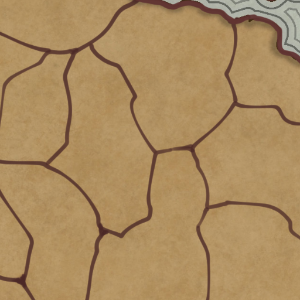

In [244]:
image = cv2.imread(imgPath)
image = cv2.resize(image, imgSize)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image_rgb)

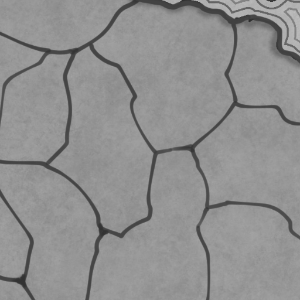

In [245]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

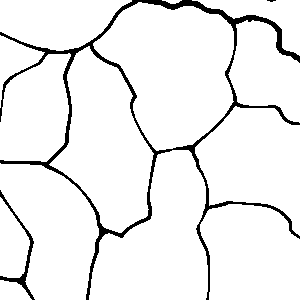

In [246]:
_, thresholded = cv2.threshold(gray, 95, 255, cv2.THRESH_BINARY)
show(thresholded)

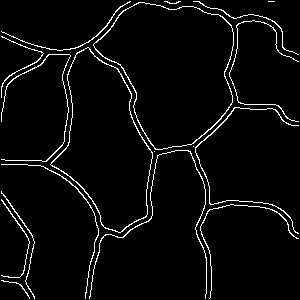

In [247]:
# CANNY
grayThreshold, sigma = 97, 2
_, thresholded = cv2.threshold(gray, grayThreshold, 255, cv2.THRESH_BINARY)
canny = feature.canny(thresholded, sigma=sigma)
show(canny)

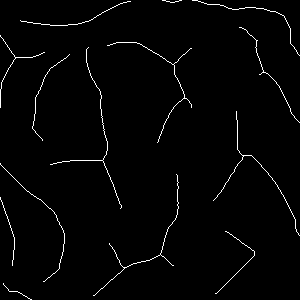

In [248]:
# MORPHOLOGY
_, edges = cv2.threshold(gray, 97, 255, cv2.THRESH_BINARY)
edges = morphology.thin(edges)
show(edges)

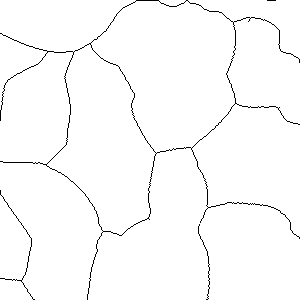

In [250]:
# Skeleton
sensitivity = 0.35
image = imread(imgPath, as_gray=True)
image = cv2.resize(image, imgSize)
binary_image = image > sensitivity
binary_image = invert(binary_image)

skeleton, distance = medial_axis(binary_image, return_distance=True)
skeleton = invert(skeleton)
show(skeleton)

14


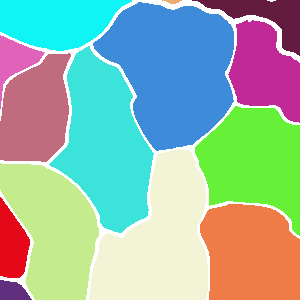

In [251]:
image = cv2.imread(imgPath, 0)
image = cv2.resize(image, imgSize)


_, thresh = cv2.threshold(image, 95, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

blank_image = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
blank_image[:] = (255, 255, 255)
print(len(contours))

for i, contour in enumerate(contours):
    color = (np.random.randint(0, 255), np.random.randint(
        0, 255), np.random.randint(0, 255))

    cv2.drawContours(blank_image, contours, i, color, -1)


show(blank_image)


14


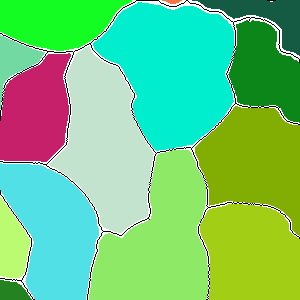

In [252]:
figure = skeleton
skeleton_uint8 = (figure * 255).astype(np.uint8)
image = cv2.imread(imgPath, 0)
image = cv2.resize(image, imgSize)

_, thresh = cv2.threshold(image, 95, 255, cv2.THRESH_BINARY)

contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

filled_image = cv2.cvtColor(skeleton_uint8, cv2.COLOR_GRAY2BGR)

points = []
for i, contour in enumerate(contours):
    color = (np.random.randint(0, 255), np.random.randint(
        0, 255), np.random.randint(0, 255))

    cv2.drawContours(filled_image, contours, i, color, -1)
    points.append(contour[0])

show(filled_image)


(0, 280) -> (37, 130, 33)
(228, 204) -> (162, 206, 22)
(0, 197) -> (187, 251, 114)
(0, 163) -> (81, 224, 229)
(172, 150) -> (141, 233, 102)
(235, 106) -> (130, 174, 4)
(68, 53) -> (198, 32, 107)
(88, 46) -> (196, 227, 207)
(0, 35) -> (114, 217, 163)
(246, 20) -> (12, 134, 24)
(138, 2) -> (0, 238, 205)
(192, 0) -> (21, 91, 68)
(162, 0) -> (243, 117, 68)
(0, 0) -> (19, 253, 34)


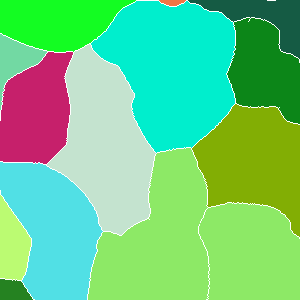

In [254]:
copy = cv2.cvtColor(invert(skeleton_uint8), cv2.COLOR_GRAY2BGR)

for point in points:
    x, y = point[0]
    color = tuple(filled_image[y, x])
    # Numeric values
    color = (int(color[0]), int(color[1]), int(color[2]))
    print(f"({x}, {y}) -> {color}")
    # Floodfill 
    cv2.floodFill(copy, None, (x, y), color)


show(copy)


1 : (0, 280) -> (240, 240, 0)
2 : (228, 204) -> (240, 225, 0)
3 : (0, 197) -> (240, 210, 0)
4 : (0, 163) -> (240, 195, 0)
5 : (172, 150) -> (240, 180, 0)
6 : (235, 106) -> (240, 165, 0)
7 : (68, 53) -> (240, 150, 0)
8 : (88, 46) -> (240, 135, 0)
9 : (0, 35) -> (240, 120, 0)
10 : (246, 20) -> (240, 105, 0)
11 : (138, 2) -> (240, 90, 0)
12 : (192, 0) -> (240, 75, 0)
13 : (162, 0) -> (240, 60, 0)
14 : (0, 0) -> (240, 45, 0)


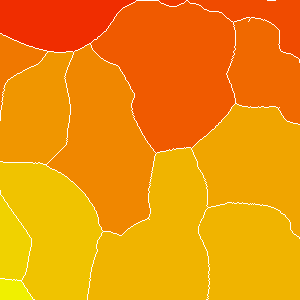

In [261]:
copy = cv2.cvtColor(invert(skeleton_uint8), cv2.COLOR_GRAY2BGR)
i = 0


for point in points:
    x, y = point[0]
    color = getColor(i)
    i += 1
    print(f"{i} : ({x}, {y}) -> {color}")
    # Floodfill 
    cv2.floodFill(copy, None, (x, y), color)


show(copy)
